In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
data = pd.read_csv('indian_liver_patient.csv')

In [216]:
data.shape

(583, 11)

In [217]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [219]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [220]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [221]:
data[data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [222]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(0)

In [223]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [224]:
liver_disease = data[data['Dataset'] == 1]
no_disease = data[data['Dataset'] == 2]

data = data.assign(liver_disease=liver_disease['Dataset'], no_disease=no_disease['Dataset'])
print(data)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [225]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,liver_disease,no_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1.0,NaN
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1.0,NaN
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1.0,NaN
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1.0,NaN
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,NaN,2.0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,1.0,NaN
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1.0,NaN
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,1.0,NaN


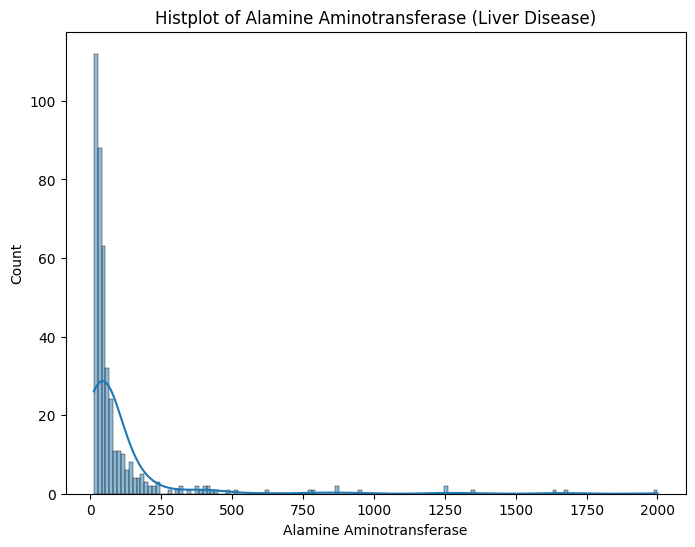

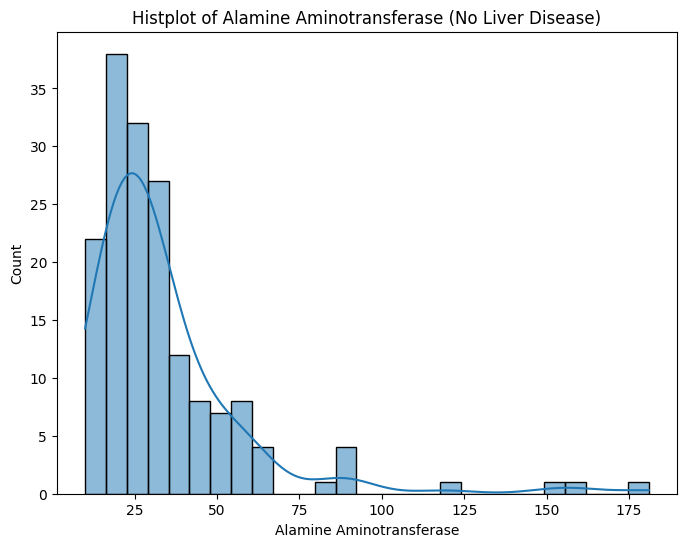

In [226]:
# Histplot for liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=liver_disease, x='Alamine_Aminotransferase', kde=True)
plt.title('Histplot of Alamine Aminotransferase (Liver Disease)')
plt.xlabel('Alamine Aminotransferase')
plt.ylabel('Count')
plt.show()

# Histplot for no_liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data= no_disease, x='Alamine_Aminotransferase', kde=True)
plt.title('Histplot of Alamine Aminotransferase (No Liver Disease)')
plt.xlabel('Alamine Aminotransferase')
plt.ylabel('Count')
plt.show()

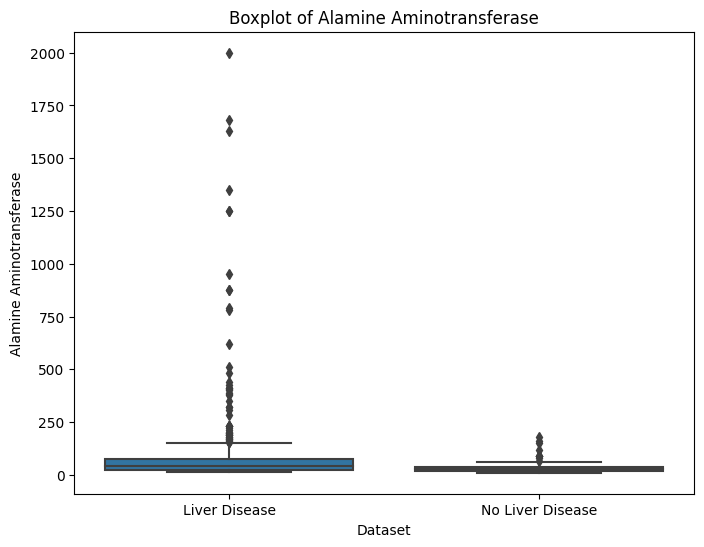

In [227]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[liver_disease['Alamine_Aminotransferase'], no_disease['Alamine_Aminotransferase']])
plt.xticks([0, 1], ['Liver Disease', 'No Liver Disease'])
plt.title('Boxplot of Alamine Aminotransferase')
plt.xlabel('Dataset')
plt.ylabel('Alamine Aminotransferase')
plt.show()

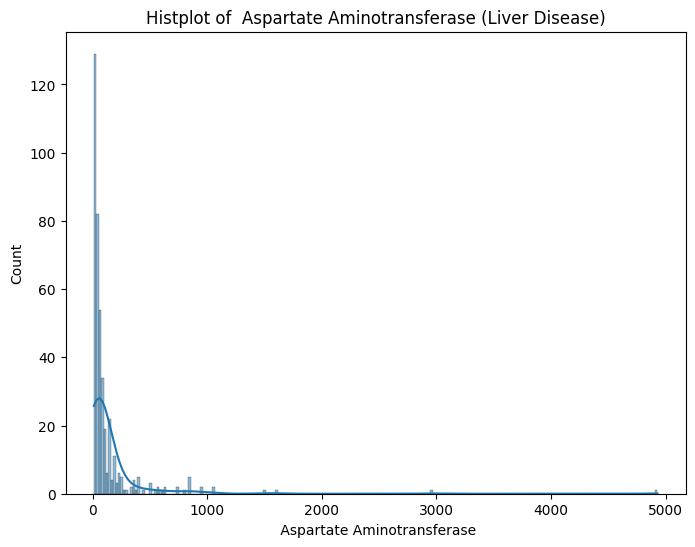

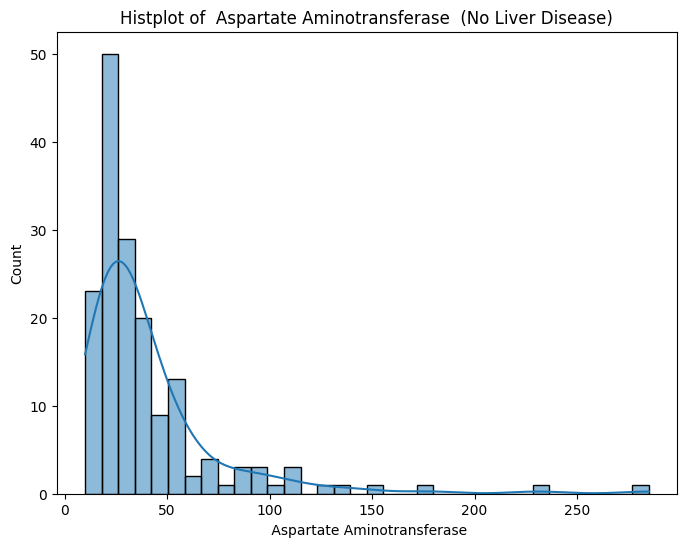

In [228]:
# Histplot for liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=liver_disease, x='Aspartate_Aminotransferase', kde=True)
plt.title('Histplot of  Aspartate Aminotransferase (Liver Disease)')
plt.xlabel(' Aspartate Aminotransferase')
plt.ylabel('Count')
plt.show()

# Histplot for no_liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data= no_disease, x='Aspartate_Aminotransferase', kde=True)
plt.title('Histplot of  Aspartate Aminotransferase  (No Liver Disease)')
plt.xlabel(' Aspartate Aminotransferase')
plt.ylabel('Count')
plt.show()

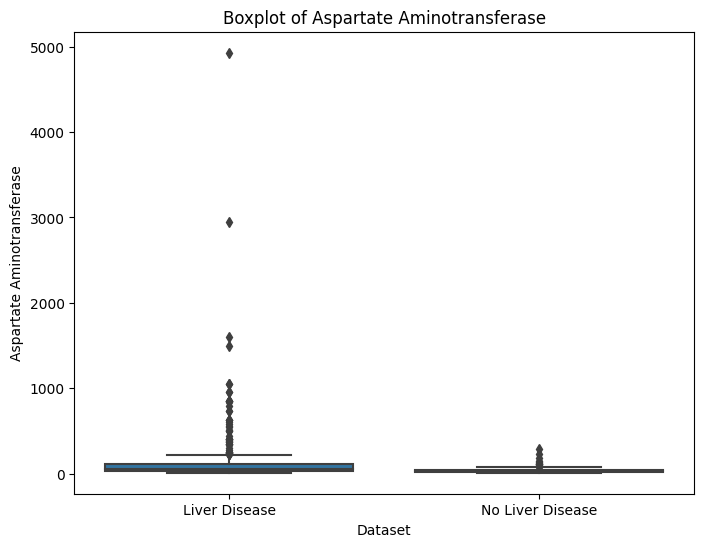

In [229]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[liver_disease['Aspartate_Aminotransferase'], no_disease['Aspartate_Aminotransferase']])
plt.xticks([0, 1], ['Liver Disease', 'No Liver Disease'])
plt.title('Boxplot of Aspartate Aminotransferase')
plt.xlabel('Dataset')
plt.ylabel('Aspartate Aminotransferase')
plt.show()

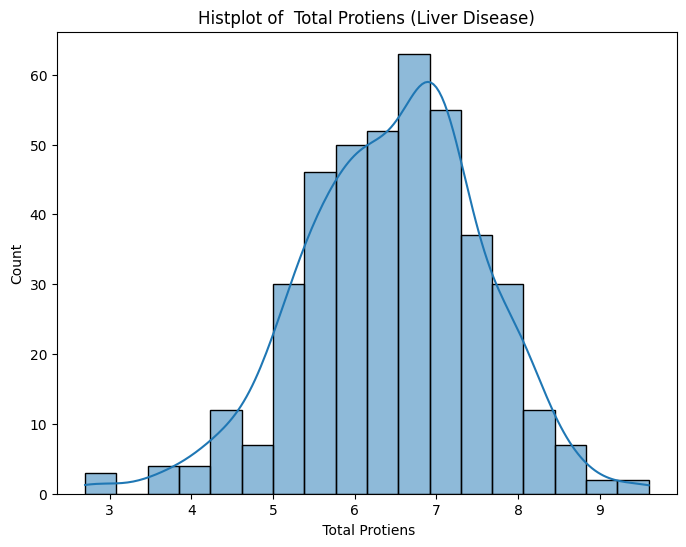

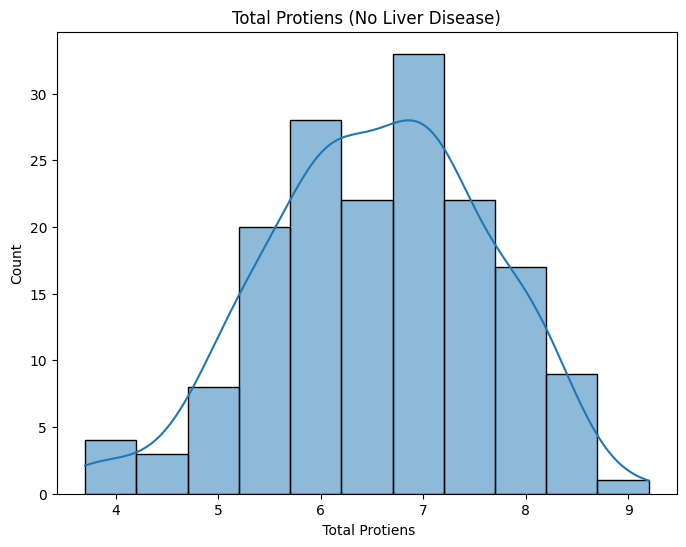

In [230]:
# Histplot for liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=liver_disease, x='Total_Protiens', kde=True)
plt.title('Histplot of  Total Protiens (Liver Disease)')
plt.xlabel(' Total Protiens')
plt.ylabel('Count')
plt.show()

# Histplot for no_liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data= no_disease, x='Total_Protiens', kde=True)
plt.title('Total Protiens (No Liver Disease)')
plt.xlabel(' Total Protiens')
plt.ylabel('Count')
plt.show()

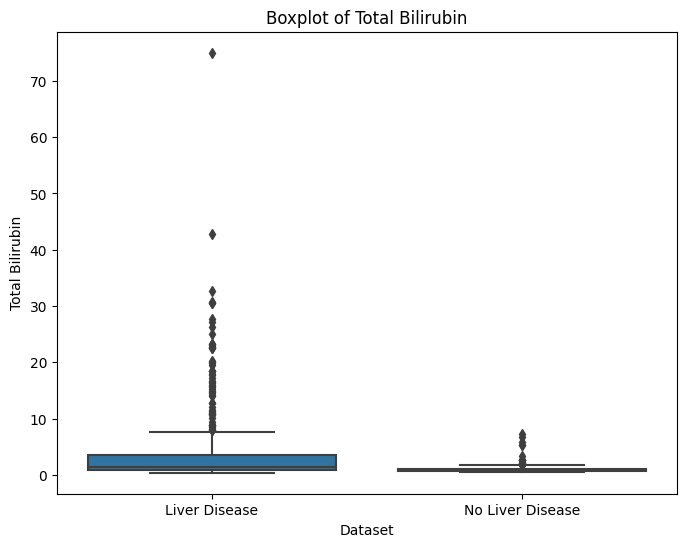

In [231]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[liver_disease['Total_Bilirubin'], no_disease['Total_Bilirubin']])
plt.xticks([0, 1], ['Liver Disease', 'No Liver Disease'])
plt.title('Boxplot of Total Bilirubin')
plt.xlabel('Dataset')
plt.ylabel('Total Bilirubin')
plt.show()

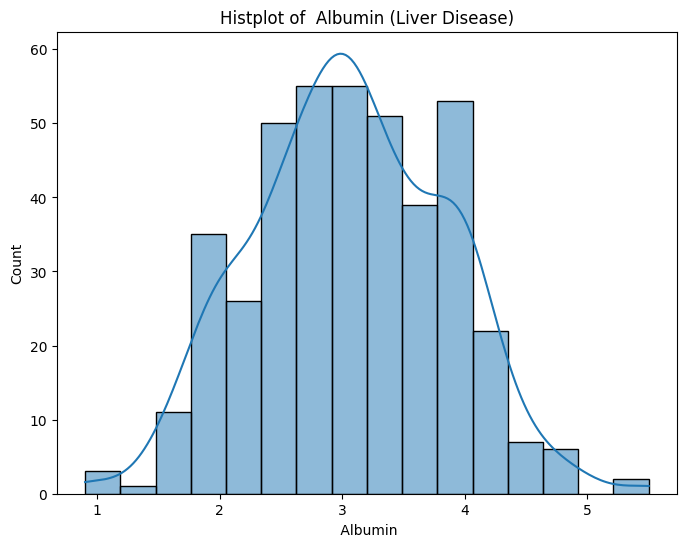

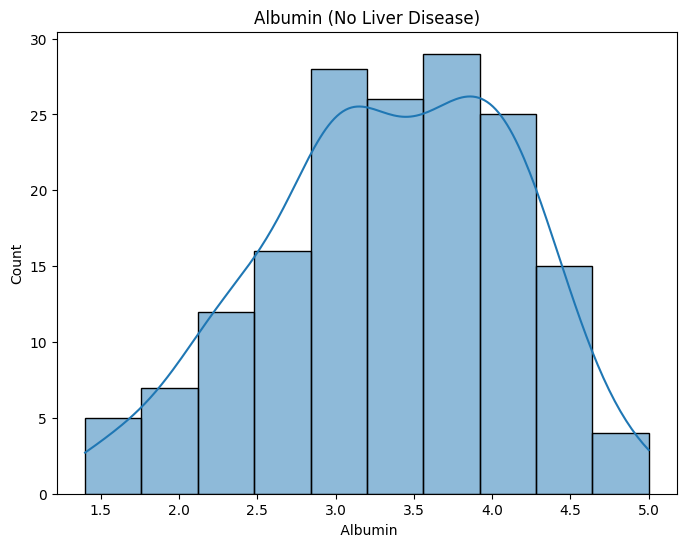

In [232]:
# Histplot for liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=liver_disease, x='Albumin', kde=True)
plt.title('Histplot of  Albumin (Liver Disease)')
plt.xlabel(' Albumin')
plt.ylabel('Count')
plt.show()

# Histplot for no_liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data= no_disease, x='Albumin', kde=True)
plt.title('Albumin (No Liver Disease)')
plt.xlabel(' Albumin')
plt.ylabel('Count')
plt.show()

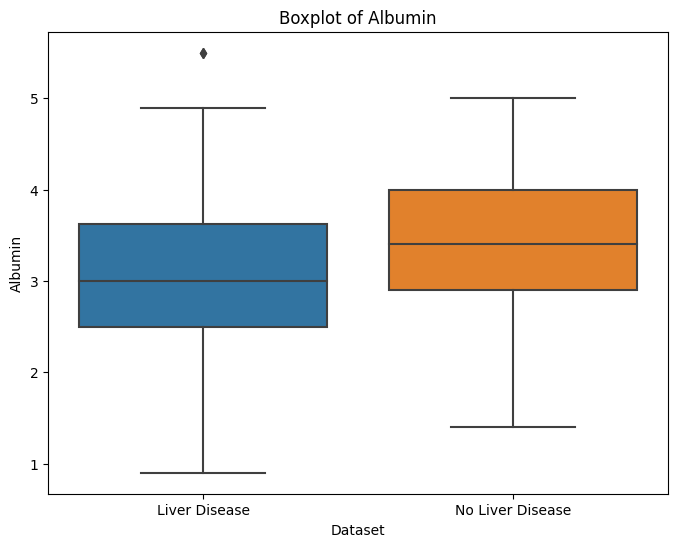

In [233]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[liver_disease['Albumin'], no_disease['Albumin']])
plt.xticks([0, 1], ['Liver Disease', 'No Liver Disease'])
plt.title('Boxplot of Albumin')
plt.xlabel('Dataset')
plt.ylabel('Albumin')
plt.show()

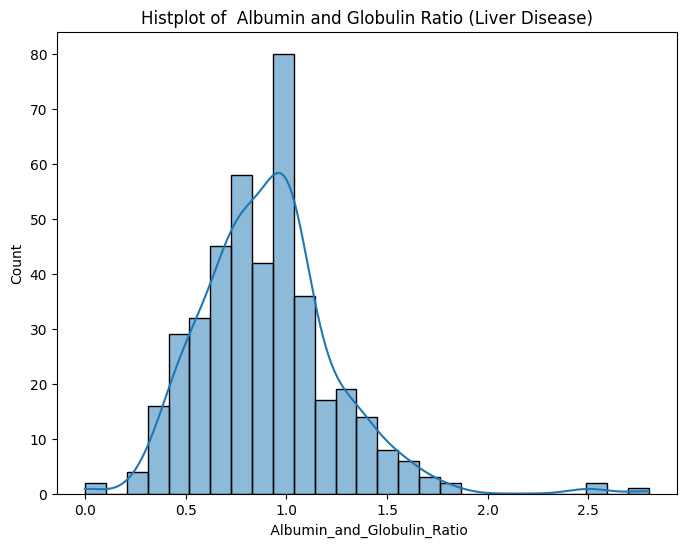

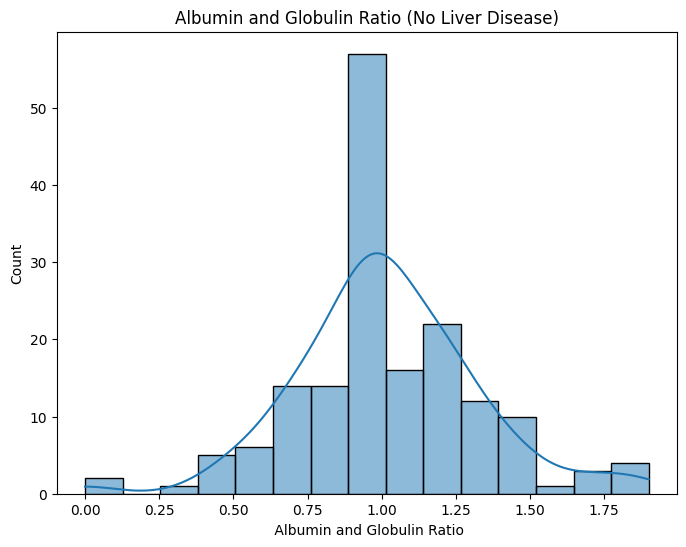

In [234]:
# Histplot for liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=liver_disease, x='Albumin_and_Globulin_Ratio', kde=True)
plt.title('Histplot of  Albumin and Globulin Ratio (Liver Disease)')
plt.xlabel(' Albumin_and_Globulin_Ratio')
plt.ylabel('Count')
plt.show()

# Histplot for no_liver_disease dataset
plt.figure(figsize=(8, 6))
sns.histplot(data= no_disease, x='Albumin_and_Globulin_Ratio', kde=True)
plt.title('Albumin and Globulin Ratio (No Liver Disease)')
plt.xlabel(' Albumin and Globulin Ratio')
plt.ylabel('Count')
plt.show()

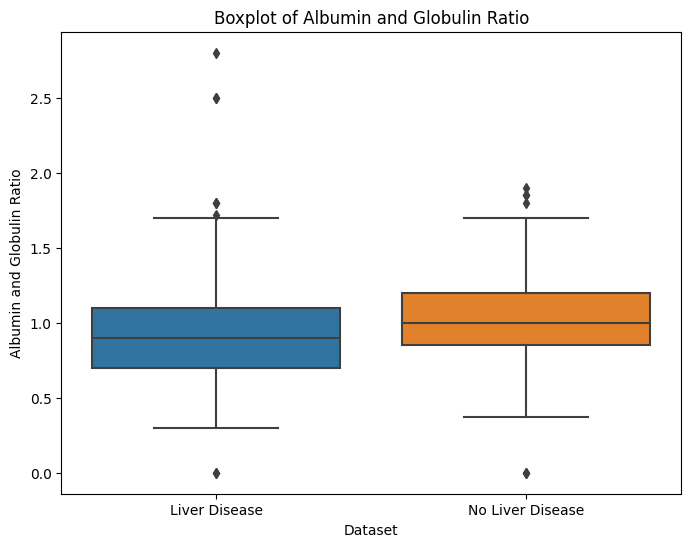

In [235]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[liver_disease['Albumin_and_Globulin_Ratio'], no_disease['Albumin_and_Globulin_Ratio']])
plt.xticks([0, 1], ['Liver Disease', 'No Liver Disease'])
plt.title('Boxplot of Albumin and Globulin Ratio')
plt.xlabel('Dataset')
plt.ylabel('Albumin and Globulin Ratio')
plt.show()

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


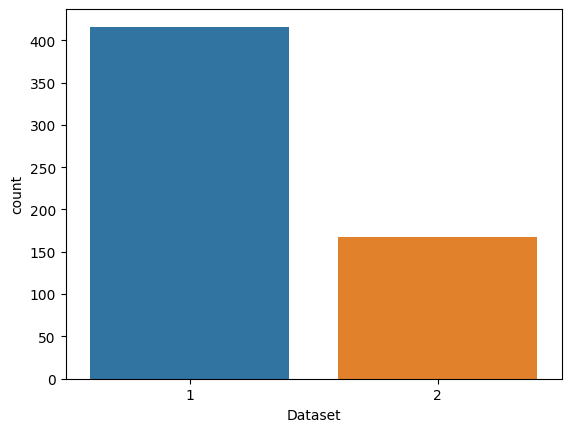

In [236]:
sns.countplot(data=data, x = 'Dataset', label='Count')

LD, NLD = data['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

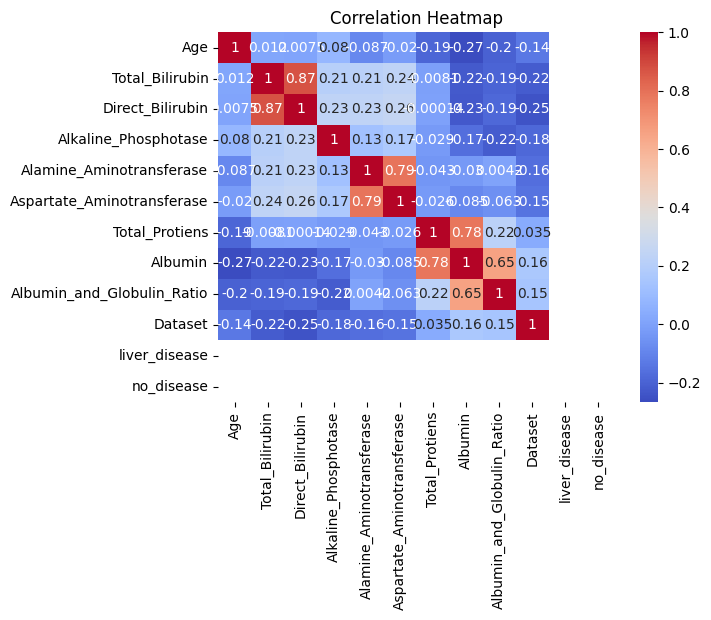

In [237]:
numeric_columns = data.select_dtypes(include=[np.number])

# correlation matrix calculation
correlation_matrix = numeric_columns.corr()

# heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

# title
plt.title('Correlation Heatmap')

# Display plot
plt.show()

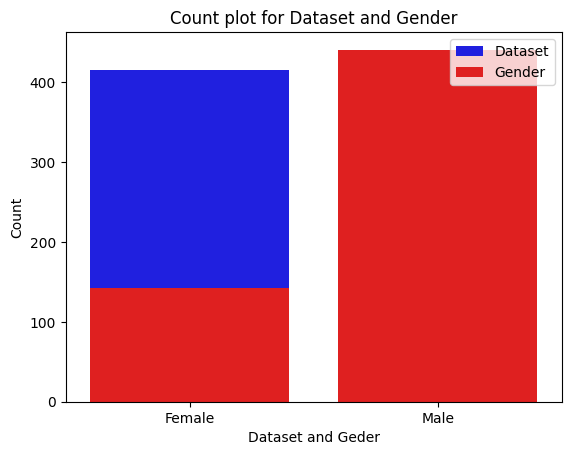

In [238]:
sns.countplot(data=data, x='Dataset', color='blue', label='Dataset')
sns.countplot(data=data, x='Gender', color='red', label='Gender')

plt.xlabel('Dataset and Geder')
plt.ylabel('Count')
plt.title('Count plot for Dataset and Gender')
plt.legend()
plt.show()

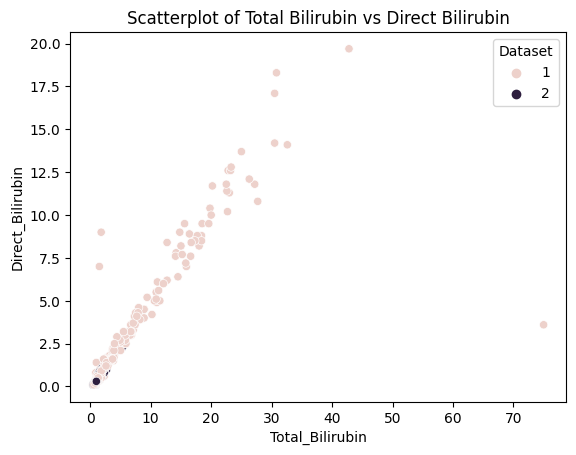

In [239]:
sns.scatterplot(data=data, x='Total_Bilirubin', y='Direct_Bilirubin', hue='Dataset')
plt.title('Scatterplot of Total Bilirubin vs Direct Bilirubin')
plt.show()

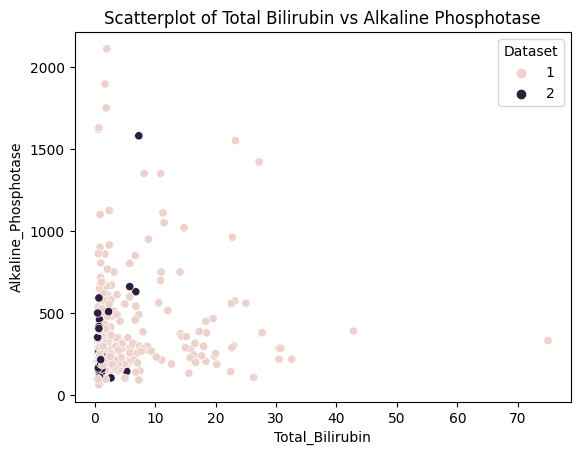

In [240]:
sns.scatterplot(data=data, x='Total_Bilirubin', y='Alkaline_Phosphotase', hue='Dataset')
plt.title('Scatterplot of Total Bilirubin vs Alkaline Phosphotase')
plt.show()

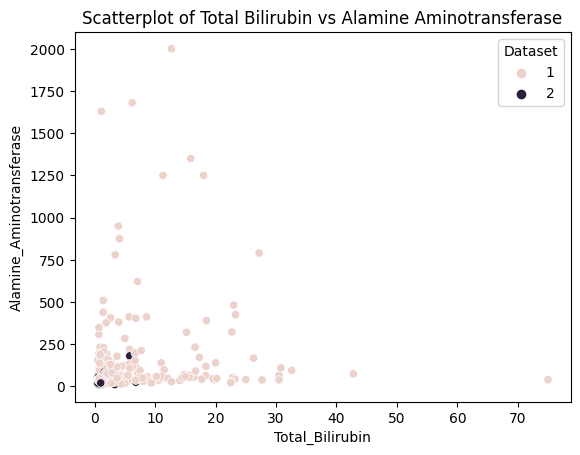

In [241]:
sns.scatterplot(data=data, x='Total_Bilirubin', y='Alamine_Aminotransferase', hue='Dataset')
plt.title('Scatterplot of Total Bilirubin vs Alamine Aminotransferase')
plt.show()

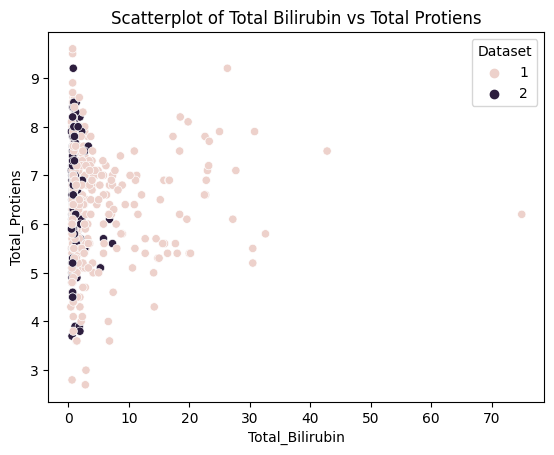

In [242]:
sns.scatterplot(data=data, x='Total_Bilirubin', y='Total_Protiens', hue='Dataset')
plt.title('Scatterplot of Total Bilirubin vs Total Protiens')
plt.show()

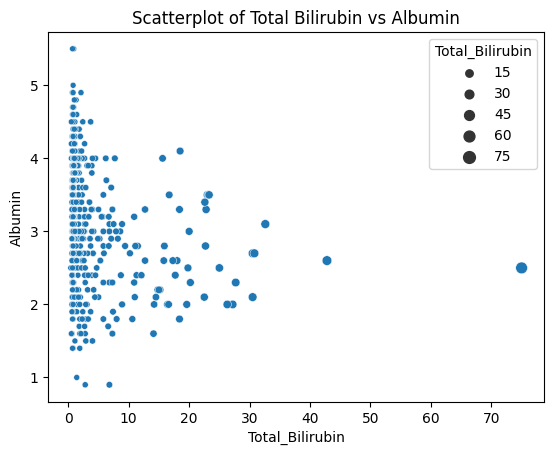

In [243]:
sns.scatterplot(data=data, x='Total_Bilirubin', y='Albumin', size='Total_Bilirubin')
plt.title('Scatterplot of Total Bilirubin vs Albumin')
plt.show()

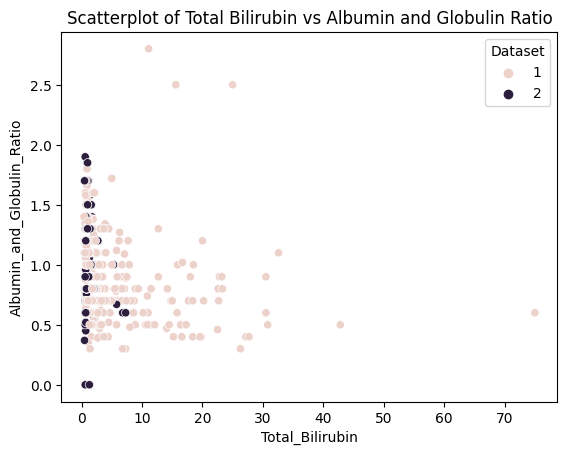

In [244]:
sns.scatterplot(data=data, x='Total_Bilirubin', y='Albumin_and_Globulin_Ratio', hue='Dataset')
plt.title('Scatterplot of Total Bilirubin vs Albumin and Globulin Ratio')
plt.show()

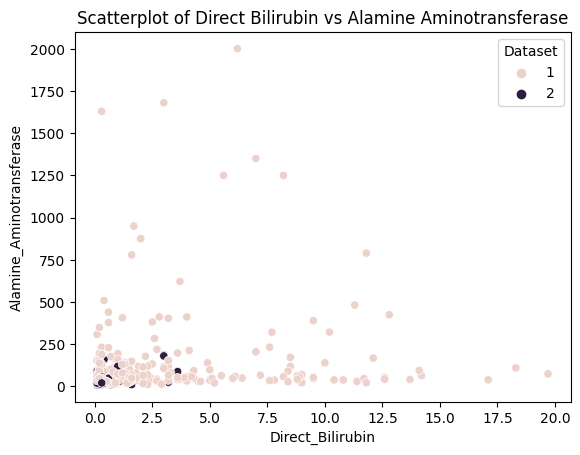

In [245]:
sns.scatterplot(data=data, x='Direct_Bilirubin', y='Alamine_Aminotransferase', hue='Dataset')
plt.title('Scatterplot of Direct Bilirubin vs Alamine Aminotransferase')
plt.show()